# Visualização de Dados com Python
### Este notebook foi criado para trabalhar com visualização de dados utilizando a base "IMDB", onde retende-se mostrar insights visuais sobre suas colunas e registos. Para tal serão utilizadas as bibliotecas Matplotlib e Seaborn.

##### Inicialmente considero importante ver rapidamente o conteúdo do ficheiro, usando "head" para ver as duas primeiras linhas de cada coluna e "shape" para saber quantas colunas e linhas totais há no ficheiro em questão. Para, assim, refletir melhor sobre o conteúdo antes de propor visualizações gráficas.

In [89]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv('IMDB-Movie-Data.csv')

# Mostrar as duas primeiras linhas de cada coluna
print(df.head(2))

# Mostrar o número total de linhas e colunas
total_linhas, total_colunas = df.shape
print(f'Total de Linhas: {total_linhas}')
print(f'Total de Colunas: {total_colunas}')

   Rank                    Title                     Genre   
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi  \
1     2               Prometheus  Adventure,Mystery,Sci-Fi   

                                         Description      Director   
0  A group of intergalactic criminals are forced ...    James Gunn  \
1  Following clues to the origin of mankind, a te...  Ridley Scott   

                                              Actors  Year  Runtime (Minutes)   
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121  \
1  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012                124   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
1     7.0  485820              126.46       65.0  
Total de Linhas: 1000
Total de Colunas: 12


**Conclusão:** O df traz dados sobre filmes, apresentando colunas interessantes de serem exploradas, como "Rating", "Votes", "Genre", "Actors" e "Year".

### Apresentações Gráficas

#### Apresentação 1
##### Escolhi como primeira apresentação visual (usando Matplotlib) um gráfico de barras com a contagem dos filmes por ano. Penso que essa decisão visual facilita a compreensão da distribuição temporal do conjunto de dados, permitindo uma rápida identificação de tendências temporais, como anos com maior ou menor produção cinematográfica.

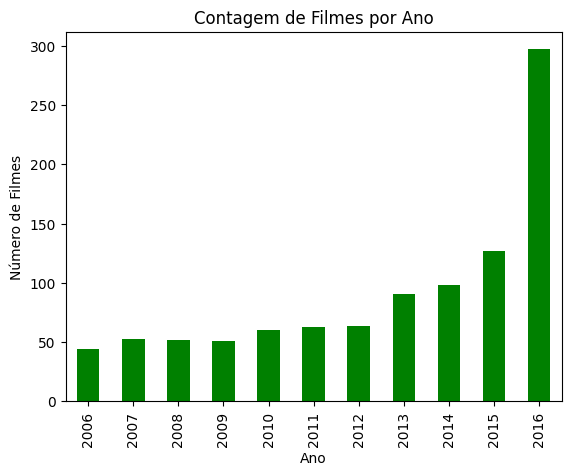

In [42]:
import matplotlib.pyplot as plt

# Contagem de Filmes por Ano em ordem cronológica
# "value_counts" conta quantas vezes cada ano aparece na coluna 'Year'.
# "sort_index" ordena os índices de maneira crescente
# "bar" para gerar o gráfico de barras e "color" para a cor 
df['Year'].value_counts().sort_index().plot.bar(color='green')

# Configurações do gráfico
plt.title('Contagem de Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Filmes')

# Exibir o gráfico
plt.show()

**Conclusão da apresentação 1:** Vemos uma diferença significativa na contagem dos filmes entre 2006 e 2016, o que sugere uma mudança na produção cinematográfica ao logo desses anos. As mudanças podem ter acontecido devido simplesmente a produção de filmes ter aumentado ou por 2016 ter sido um ano de potencial crescimento na indústria do cinema. Também por questões de investimento financeiro, aumento do número de estúdios, mudanças preferenciais do público, avanços tecnológicos, entre outros fatores.

#### Apresentação 2
##### A escolha desta visualização busca proporcionar uma compreensão rápida e visualmente atrativa (usando Seaborn) da distribuição de ratings/avaliação dos filmes, destacando padrões e facilitando a interpretação dos dados. Vale ressaltar que rating é uma métrica de qualidade média do filme, enquanto a quantidade de votos representa a popularidade ou a quantidade de interações que o filme recebeu.

<Figure size 1000x600 with 0 Axes>

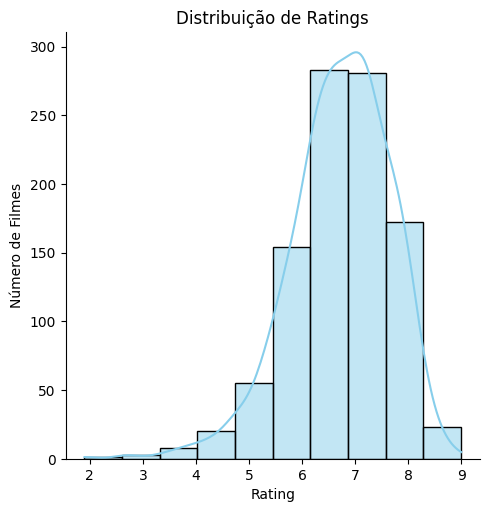

In [38]:
import seaborn as sns

# Criar um histograma com uma linha de densidade usando displot
# "kde" para adicionar uma linha de densidade.
# "bins=10" para mostrar um intervalo de 10, ou seja, apresentar 10 barras
plt.figure(figsize=(10, 6))
sns.displot(df['Rating'], kde=True, bins=10, color='skyblue')

# Configurações do gráfico
plt.title('Distribuição de Ratings')
plt.xlabel('Rating')
plt.ylabel('Número de Filmes')

# Exibir o gráfico
plt.show()

**Conclusão da apresentação 2:** Vemos que existiu uma grande variação de ratings/avaliações e que eles possuem uma tendência à média (6.7231999999999999). Isso pode ocorrer quando os espectadores atribuem ratings moderados por padrão. A qualidade dos filmes, escolha de títulos mais populares ou preferência do público também podem ter sido responsáveis por esse rating/avaliação.

#### Apresentação 3
##### Como o df possui muitos gêneros e muitos filmes, escolhi esta apresentação (usando Seaborn) para resumir os filmes mais votados pelo público, ou seja, para apresentar o top 10 dos filmes mais populares e, consequentemente, seus gêneros. Visualizar o top 10 pode ser útil em diversos contextos, desde análises de mercado, compreensão de popularidade e até a criação de conteúdo mais direcionado.

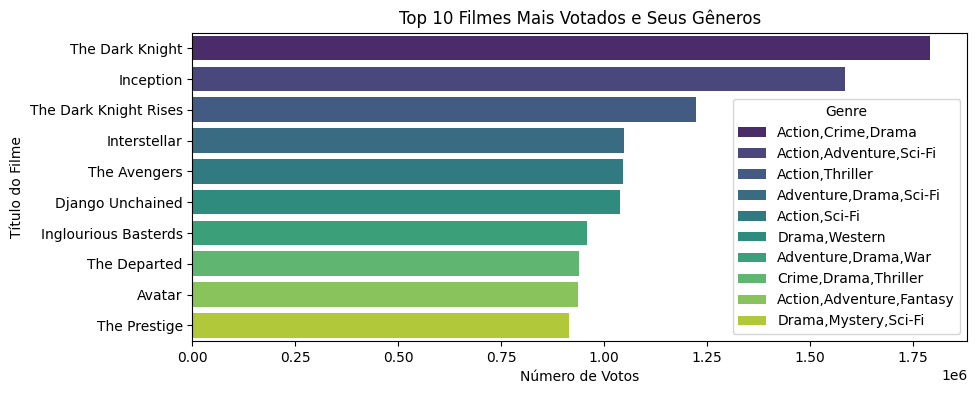

In [68]:
# Identificar os top 10 filmes mais votados, usando a coluna 'Votes' em ordem decrescente.
# (ascending=False) - assim os filmes com o maior número de votos aparecerão no topo.
top10_movies = df.sort_values(by='Votes', ascending=False).head(10)

# Criar um gráfico de barras empilhadas para visualizar s top 10 de filmes mais votados e seus gêneros
plt.figure(figsize=(10,4))
sns.barplot(x='Votes', y='Title', hue='Genre', data=top10_movies, palette='viridis')

#Configurações do gráfico
plt.title('Top 10 Filmes Mais Votados e Seus Gêneros')
plt.xlabel('Número de Votos')
plt.ylabel('Título do Filme')

# Exibir o gráfico
plt.show()

**Conclusão da apresentação 3:** Com a visualização vemos que o gênero mais popular é "Ação". Em determinados contextos essa análise pode ser valiosa para a insdústria cinematográfica, visto que insights estratégicos podem impactar as decisões de produção, marketing e distribuição.

#### Apresentação 4
##### Escolhi esta apresentação para mostrar o top 20 dos filmes com maior faturamento e a prevalência do gênero "Ação" também  no quesito faturamento. Além disso, visualizar o faturamento é crucial para produtores, estúdios e investidores avaliarem o sucesso econômico de um projeto.

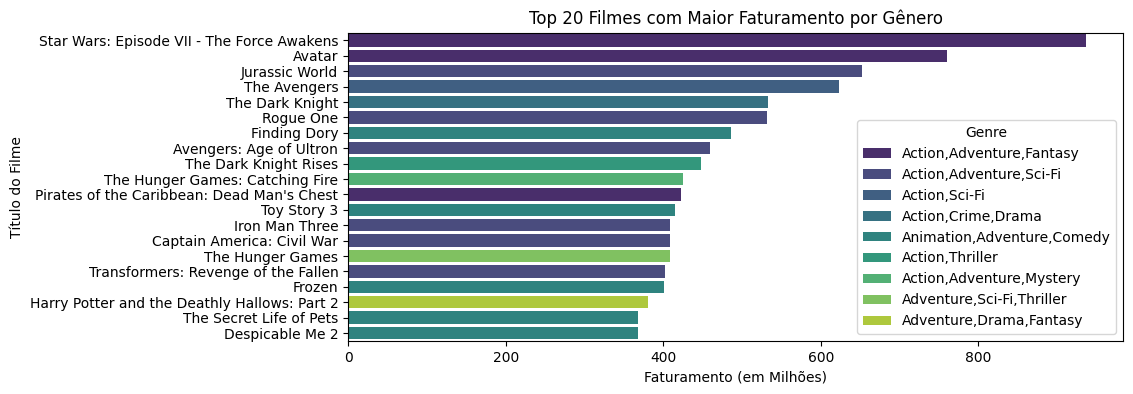

In [69]:
# Identificar o top 5 filmes com maior faturamento
top20_revenue_movies = df.sort_values(by='Revenue (Millions)', ascending=False).head(20)

# Criar um gráfico de barras para visualizar os top 20 filmes com maior faturamento
plt.figure(figsize=(10, 4))
sns.barplot(x='Revenue (Millions)', y='Title', data=top5_revenue_movies, hue='Genre', palette='viridis')

# Configurações do gráfico
plt.title('Top 20 Filmes com Maior Faturamento por Gênero')
plt.xlabel('Faturamento (em Milhões)')
plt.ylabel('Título do Filme')

# Exibir o gráfico
plt.show()

**Conclusão da apresentação 4:** Em poucas palavras, podemos dizer que se o gênero mais popular também é o gênero com maior faturamento, significa que os dados estão coerentes. Além de representar o desempenho financeiro de um filme, o faturamento guia escolhas de investimento, alocação de recursos e avaliação de estratégias de marketing. O faturamento não só indica sucesso financeiro, mas também serve como indicador do impacto cultural, influenciando conversas e moldando a cultura popular.